name: Gilad X
id : X
homework #3




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random


In [ ]:
##just for image download
import urllib.request

image_url = 'https://u.cs.biu.ac.il/~kapaho/IP/Images/binary/binary1.tiff'
image_path = 'binary.jpg'
urllib.request.urlretrieve(image_url , image_path)

('binary.jpg', <http.client.HTTPMessage at 0x7ff11fab1c90>)

In [ ]:
image = plt.imread(image_path).astype(float)

In [ ]:
image.shape

(30, 30)

In [ ]:
def plot_image(image):  ## func to dispaly hte image , after clipping to normal levels , using 0-255 as values , and greyscale.
  image = np.clip(image , 0 ,1)
  image = image.astype(np.uint8)
  plt.imshow(image , cmap ='gray')
  plt.show()

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0

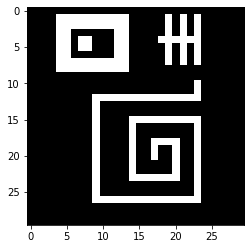

In [ ]:
row , col = image.shape
binImage = np.zeros(image.shape)

for i in range(row):
  for j in range(col):
    if image[i][j] >0 : binImage[i][j] = int(1)
    else: binImage[i][j]=int(0)
binImage = binImage.astype(int)
print(binImage)
plot_image(binImage)



In [ ]:
tstIMG=binImage.copy()

In [ ]:
def segm2(image):
  segIMG = np.zeros(image.shape ,int)
  height ,width = image.shape
  segCounter = 0
  myDict = {}
  for row in range(height):
    for col in range(width):
      if image[row][col] == 0:
        segIMG[row][col]= 0
      else:
        if row ==0 and col ==0:
          segCounter+=1
          segIMG[row][col] = segCounter
        elif row == 0 :
          if segIMG[row][col-1] !=0 :
            segIMG[row][col] = segIMG[row][col-1]
          else:
             segCounter+=1
             segIMG[row][col] = segCounter
        elif col == 0 :
          if segIMG[row-1][col] !=0 :
            segIMG[row][col] = segIMG[row-1][col]
          else:
             segCounter+=1
             segIMG[row][col] = segCounter
        else : #check both neighbors
          if segIMG[row][col-1] ==0 and segIMG[row-1][col] ==0 :
            segCounter+=1
            segIMG[row][col] = segCounter
          else : # both not zero
           if segIMG[row][col-1] !=0 and segIMG[row-1][col] !=0 and segIMG[row][col-1] !=segIMG[row-1][col] :
             segIMG[row][col] = segIMG[row][col-1]
             if segIMG[row][col] in myDict.keys():
               myDict.update({segIMG[row-1][col]:myDict[segIMG[row][col-1]]})
             else:myDict.update({segIMG[row-1][col]:segIMG[row][col-1]})
            # print(myDict)
           else: #one is zero
              segIMG[row][col] = max(segIMG[row-1][col] , segIMG[row][col-1] )
  flag=1
  while  flag:
  # print("in while")
   flag =0
   for row in range(height):
     for col in range(width):
       if segIMG[row][col] in myDict.keys():
        segIMG[row][col] = myDict.get(segIMG[row][col])
        flag=1


   return segIMG


In [ ]:
segIMG = segm2(tstIMG)

In [ ]:
def pixels(image):

  height , width = image.shape
  for i in range(1,image.max()):
    listi=[]
    for row in range(height):
      for col in range(width):
        if image[row][col] == i:
          j = (row,col)
          listi.append(j)
    if listi != []:
     print("object "+str(i)+" pixels:")
     print(listi)

In [ ]:
pixels(segIMG)

object 1 pixels:
[(1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (3, 4), (3, 5), (3, 12), (3, 13), (4, 4), (4, 5), (4, 12), (4, 13), (5, 4), (5, 5), (5, 12), (5, 13), (6, 4), (6, 5), (6, 12), (6, 13), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (7, 13), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (8, 10), (8, 11), (8, 12), (8, 13)]
object 5 pixels:
[(4, 7), (4, 8), (5, 7), (5, 8)]
object 6 pixels:
[(1, 19), (1, 21), (1, 23), (2, 19), (2, 21), (2, 23), (3, 19), (3, 21), (3, 23), (4, 18), (4, 19), (4, 20), (4, 21), (4, 22), (4, 23), (5, 19), (5, 21), (5, 23), (6, 19), (6, 21), (6, 23), (7, 19), (7, 21), (7, 23)]
object 8 pixels:
[(10, 23), (11, 23), (12, 9), (12, 10), (12, 11), (12, 12), (12, 13), (12, 14), (12, 15), (12, 16), (12, 17), (12, 18), (12, 19), (12, 20), (12, 21), (12, 22), (12, 23), (13, 9), (14, 9), (15, 9), (15, 14), (1

In [ ]:
def imgobject (image):
  height , width = image.shape
  for i in range(1,image.max()):
     flag=0
     objpic = np.zeros(image.shape)
     for row in range(height):
       for col in range(width):
         if image[row][col] == i:
          objpic[row][col] = 1
          flag=1
     if flag:
      plot_image(objpic)


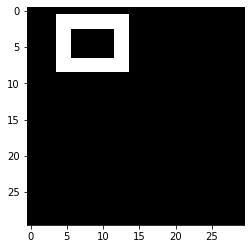

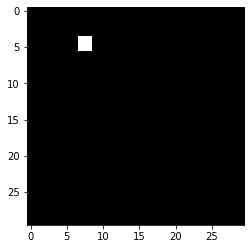

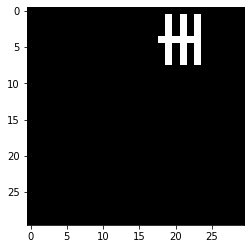

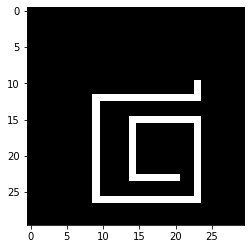

In [ ]:
imgobject(segIMG)

In [ ]:
def imgobjectnum (image,a):
  height , width = image.shape
  i=a
  objpic = np.zeros(image.shape)
  for row in range(height):
     for col in range(width):
       if image[row][col] == i:
          objpic[row][col] = 1

  return objpic


In [ ]:
skelimg=imgobjectnum(segIMG,1)
#make somn more interesting than 2 pixel width
height, width = skelimg.shape
for row in range(1,8):
  for col in range (4 ,13):
    skelimg[row][col] = 1

In [ ]:
def disTrans(image):
  #get bin image - output distance transformed pic
  height , width = image.shape
  disIMG = image.copy()
  flag=1
  while flag :
    flag=0
    for row in range(1,height-1):
      for col in range(1,width-1):
        if disIMG[row-1][col] !=0 and disIMG[row][col-1] !=0 and disIMG[row+1][col] !=0 and disIMG[row][col+1] !=0 :
         if disIMG[row-1][col]>=disIMG[row][col] and disIMG[row][col-1]>=disIMG[row][col] and disIMG[row+1][col]>=disIMG[row][col] and disIMG[row][col+1]>=disIMG[row][col]:
          #all neighbors bigger or same
          disIMG [row][col] +=1
          flag =1
  return disIMG


In [ ]:
skeleton = disTrans(skelimg)
skeleton = skeleton.astype(int)
print(skeleton)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 2 2 2 2 2 2 2 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 2 3 3 3 3 3 3 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 2 3 4 4 4 4 3 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 2 3 4 4 4 4 3 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 2 3 3 3 3 3 3 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 2 2 2 2 2 2 2 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [ ]:

def checkneighbors(image , a ,b): #returns grad
  row =a
  col =b
  n1 = image [row-1][col-1]
  n2 = image [row-1][col]
  n3 = image [row-1][col+1]
  n4 = image [row][col+1]
  n5 = image [row+1][col+1]
  n6 = image [row+1][col]
  n7 = image [row+1][col-1]
  n8 = image [row][col-1]
  pix = image[row][col]
  myarr = np.zeros(8)

  myarr[0]=n1 - pix - n5
  myarr[1]= n2 - pix - n6
  myarr[2]= n3 - pix - n7
  myarr[3]= n4 - pix - n8
  myarr[4]= n5 - pix - n1
  myarr[5]= n6 - pix - n2
  myarr[6]= n8 - pix - n4
  myarr[7]= n8 - pix - n4
  newarr = myarr.copy()
  #print(myarr)

  newarr = sorted(newarr)
  #print(newarr)
  j=300
  if newarr[0] != newarr[1] :  #we have smallest
   for i in range(7):
    if myarr[i] == newarr[0]:
      j=i
  return j


In [ ]:
print(checkneighbors(skeleton , 4 ,4))

300


In [ ]:
def pixels2(image,obj): ### just for skeletor

  height , width = image.shape

  listi=[]
  for row in range(height):
    for col in range(width):
      if image[row][col] == obj:
         j = (row,col)
         listi.append(j)
  if listi != []:

     return listi

In [ ]:
def imgobject2 (image):
  height , width = image.shape
  arr1=np.zeros(height,width,image.max())
  for i in range(1,image.max()):
     flag=0
     objpic = np.zeros(image.shape)
     for row in range(height):
       for col in range(width):
         if image[row][col] == i:
          objpic[row][col] = 1
          flag=1
     if flag:
      arr1[height][width] = objpic.copy()
  return arr1

every pix that has 2 furthest neighbors is center of rad in the shape , so belongs to skeleton and thats it.

In [ ]:
def skelet(image):  # just the frame!!!
  #all the setting ups
  height , width = image.shape
  skeleton = np.zeros(image.shape)    #result.     now we need to fix doublecheker - fixed - to check
  disMap = disTrans(image).copy()
  levels = disMap.max()

  #loop ascending levels , for each pixel in lvl , check for number of  furthest neighbors - pass number to func to find idx of these furthest points
  #color these idx in skelemap ,.   ---- u dont need index or shit , just in case returns true - add to skeleton
  if disMap.max()>1:
   for  x in range(height):
    for  y in range(width):

      if disMap[x][y] != 0:
       if izzitskel(x,y,disMap):     #check distance for every pix not 0 in map
          skeleton[x][y]=1
  else: skeleton=image.copy()

  #print(skeleton)                            #arr- dist idx idy
  return skeleton


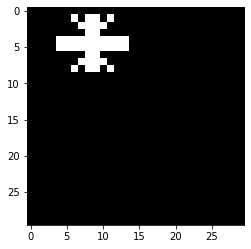

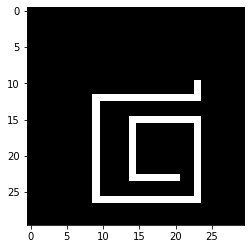

In [ ]:

plot_image(skelet(skeleton))
plot_image(skelet(skeleton2))

In [ ]:

skeleton2=imgobjectnum(segIMG,8)
skeleton3 = enlarge(skeleton2)

In [ ]:
def enlarge(image):
  row,col = image.shape
  newIMG=np.zeros[5*row,5*col]


In [ ]:
def distance(point1,point2):
  a= np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)
  return a

In [ ]:
def izzitskel(x,y,map):
  otherpix=0
  counter=0
  row ,col = map.shape
  for i in range(row):
    for j in range(col):
      if map[i][j] != 0: otherpix+=1

  arr=np.zeros(otherpix)

  for i in range(row):
    for j in range(col):
       if map[i][j] != 0:
        # print("in range")

        arr[counter] = distance((i,j),(x,y))

        counter+=1
        #  print(distance([i,j],[y,x]))
        # print(counter)







  return dup_check2(arr)

In [ ]:
def dup_check2(arr):
  ordCropedArr= arr.copy()   ## might not work , check
  ordCropedArr.sort()
  ordCropedArr= ordCropedArr[::-1]
  ordCropedArr= ordCropedArr[:3]

  a_set = set(ordCropedArr)
 ## print(a_set)
  #print(ordCropedArr)
  return ( len(a_set) != len(ordCropedArr))
